In [1]:
#Target
#Predict the percentage of an student based on the no. of study hours.
#What will be predicted score if a student studies for 9.25 hrs/ day?
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# reading the data from link
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

In [3]:
#checking the first 5 records of the data set
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking the last 5 records of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# checking the shape of the data set
data.shape

(25, 2)

In [6]:
# checking for the null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


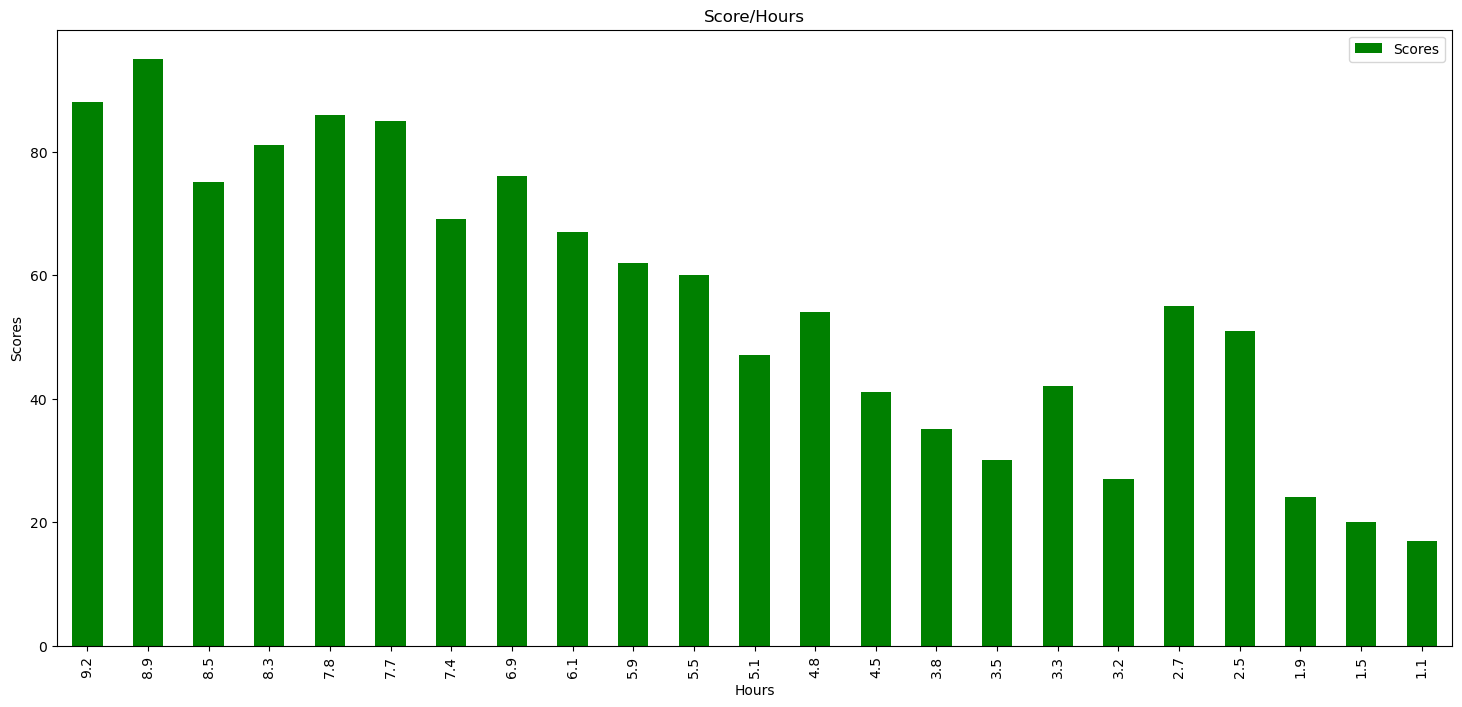

In [8]:
# score vs hours
csp = data.groupby("Hours")[["Scores"]].sum().sort_values(by = "Hours", ascending = False)
csp[:].plot.bar(color = ["green"],figsize= (18,8))
plt.title("Score/Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

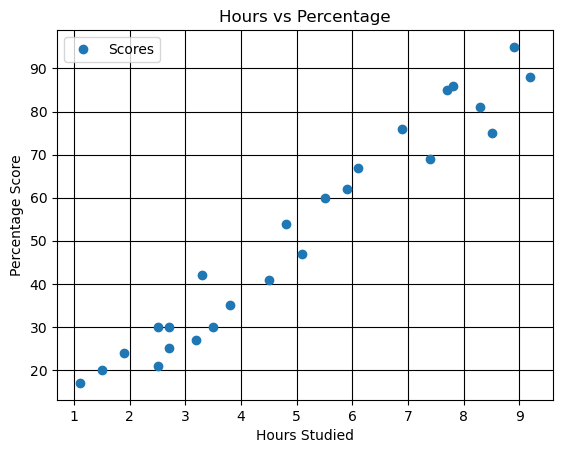

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(color="black")
plt.show()

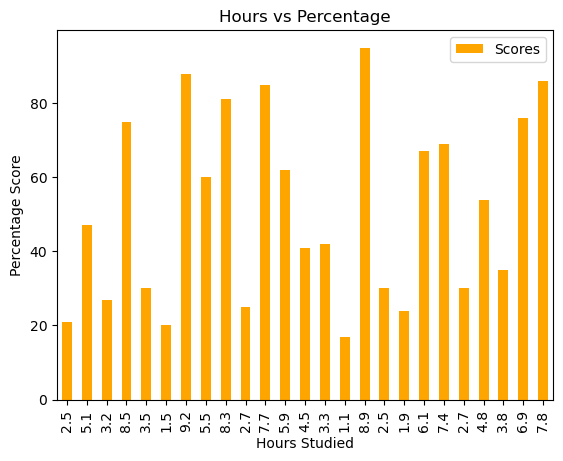

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',kind='bar',color="orange") 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
#Data Preparation
df = data.copy()
# spliting the data set into dependent and independent feature 
X = df.iloc[:, :-1].values    # independent feature
y = df.Scores  # dependent feature

In [12]:
# importing libraires from sklearn and spliting the data set into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [13]:
#Training the algoritham
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # regressor is the object of Linear regression class 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
y_pred=regressor.predict(X_test)
print(y_pred)
# ACTUAL Vs PREDICTED percentage Score
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


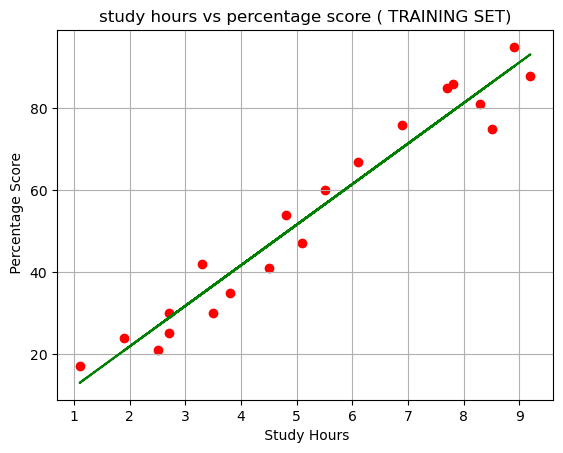

In [15]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'green')
plt.title("study hours vs percentage score ( TRAINING SET)")
plt.xlabel(" Study Hours")
plt.ylabel(" Percentage Score")
plt.grid()
plt.show()

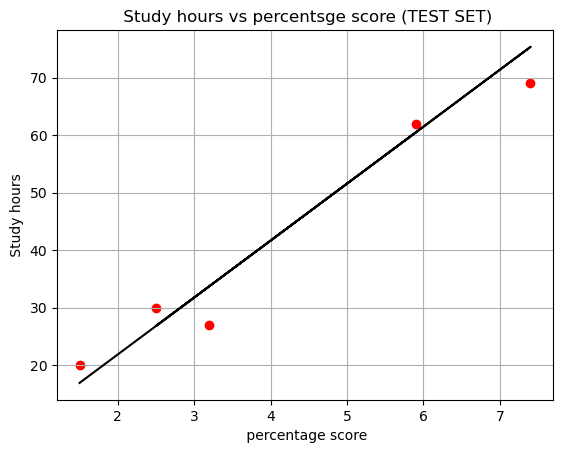

In [16]:
#visualising the test set Result
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,regressor.predict(X_test),color = 'black')
plt.title(" Study hours vs percentsge score (TEST SET)")
plt.xlabel(" percentage score")
plt.ylabel( " Study hours ")
plt.grid()
plt.show()

In [17]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
Study_hours = 9.25
percentage_pred=regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [18]:
#conclusion 
#if a student studies for 9.25 hrs/day his or her predicted Score will be  93.69173248737538 %